# Regression Tree Demonstration

This notebook will demonstrate how to implement a regression tree using Python, skikit-learn and pandas.

In [9]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor 
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')

#These libraries are used to visualize the decision tree and require that you have GraphViz
#and pydot or pydotplus installed on your computer.
from sklearn.externals.six import StringIO  
from IPython.core.display import Image
import pydotplus as pydot

## Boston Housing Price Data Set
Skikit learn includes a series of datasets which are common for machine learning instruction.  Among them is the Boston housing pricing dataset which you can view here:  http://lib.stat.cmu.edu/datasets/boston

The dataset contains the following fields:
1. CRIM: per capita crime rate by town 
2. ZN: proportion of residential land zoned for lots over 25,000 sq.ft. 
3. INDUS: proportion of non-retail business acres per town 
4. CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise) 
5. NOX: nitric oxides concentration (parts per 10 million) 
6. RM: average number of rooms per dwelling 
7. AGE: proportion of owner-occupied units built prior to 1940 
8. DIS: weighted distances to five Boston employment centres 
9. RAD: index of accessibility to radial highways 
10. TAX: full-value property-tax rate per \$10,000 
11. PTRATIO: pupil-teacher ratio by town 
12. B: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town 
13. LSTAT: % lower status of the population 
14. MEDV: Median value of owner-occupied homes in $1000's

To load the dataset, simply import it from sklearn.datasets

```python
from sklearn.datasets import load_boston
boston = load_boston()
```
Many texts will refer to these variables as X and y.  I believe that works for math, but in my experience, one of the best ways to write buggy code is to use non-descriptive variable names such as X, Y.  Therefore, in this example you will see X referred to as data, and Y referred to as target.

In [47]:
#Load dataset
from sklearn.datasets import load_boston
boston = load_boston()

#Store the data and target into local variables
data, target = boston.data, boston.target

#Store the features into a local variable
features = boston.feature_names

## Viewing the Data
I believe it is always a good idea to know your data before you start putting it through a machine learning algorithm and the code below will load the data into a Pandas DataFrame.  Scikit-Learn can accept NumPy arrays, Python Arrays, or Pandas DataFrames as input, however there is an associated overhead with using Pandas, so if it is not needed, your code will be more efficient if you don't use it.


In [53]:
df = pd.DataFrame( data, columns=features )
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


## Creating the Tree

Next you have to create the regression tree.  To do this, you'll first import the necessary portion of scikit-learn:
```python
from sklearn.tree import DecisionTreeRegressor 
```
The constructor takes a lot of optional arguments which you can read about here: (http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html)  Probably the most important is the ```max_depth``` which limits the depth of the tree and can prevent overfitting.  The example here includes a minimum of 30 examples to split the data and a minimum of 10 items to declare a node a leaf.

Next, you will have to train the tree by calling the ```.fit()``` method.  

In [54]:
#Create the tree object
regression_tree = DecisionTreeRegressor( min_samples_split=30, min_samples_leaf=10 )
#Train the tree
result = regression_tree.fit( data, target )

## Make a Prediction and Evaluate the Result
The next thing you can do with your regression tree is to make a prediction with it using the predictably named ```.predict()``` method.  In order to make a prediction, you will need to provide the ```.predict()``` method with an array-like variable containing the same number of fields as the training data.

In [61]:
#Pick a row out of the training data and assign it to a local variable
testData = data[10]
testTarget = target[10]

#Make the prediction using the .predict() method
result = regression_tree.predict( testData )
r2 = regression_tree.score( data, target )

#Output the results
print( "The predicted result is: " + str(result[0]) )
print( "The actual result is: " + str( testTarget ) )
print( "The R-squared value is: " + str( r2 ) ) 


The predicted result is: 19.0666666667
The actual result is: 15.0
The R-squared value is: 0.85270560693


##Visualize the Tree
An optional step is to visualize the tree.  This can be easily accomplished if you have Graphviz installed on your computer (available here: http://www.graphviz.org) as well as the Python libraries necessary to interact with Graphviz.  If you are using Python 2, you'll need ```pydot``` and if you are using Python3 you will need ```pydotplus```.  These modules are hosted on Pypi and can be installed via ```pip install pydot``` or ```pip install pydotplus```. 

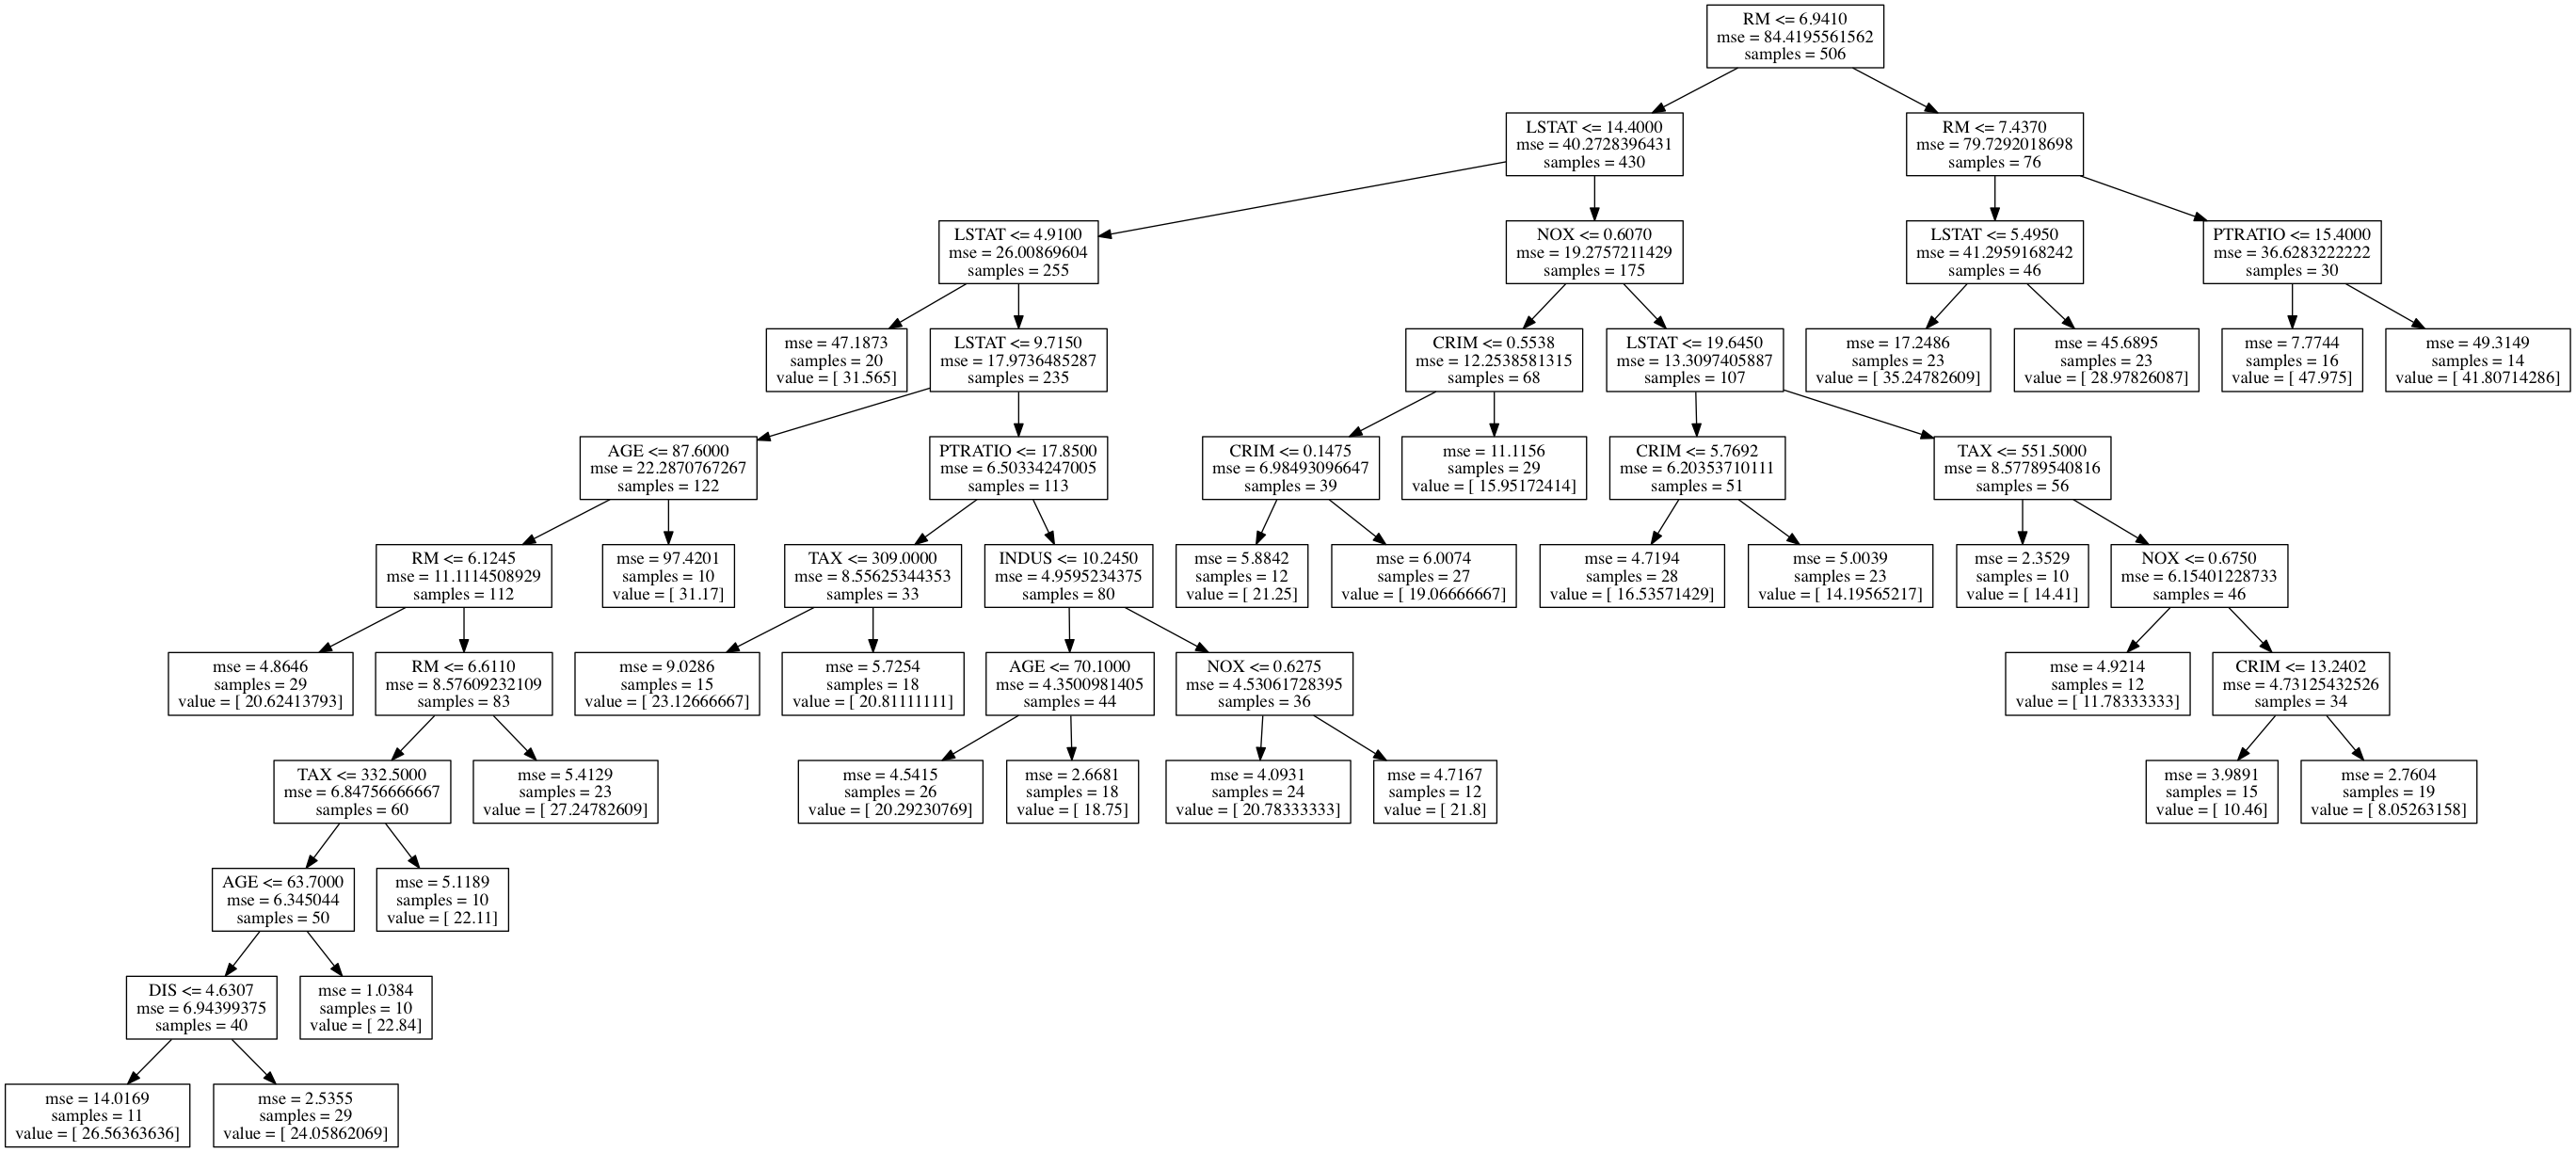

In [63]:
from sklearn import tree
dot_data = StringIO() 

#Export the tree into Graphviz format
tree.export_graphviz(regression_tree, out_file=dot_data, feature_names=features) 

#Draw the tree
graph = pydot.graph_from_dot_data(dot_data.getvalue()) 

#Render the image
Image(graph.create_png())